# Overview
We will analyze two datasets related to Covid-19, Covid-19 World Vaccination Progress by country and Covid -19 death/cases data by country to try.
We will perfrom hypothesis test to infere if increased Covid-19 vaccination will result in lower Covid-19 case counts.

In [1]:
#Importing Data Exploration and Clean Up File
%run Data_Exploration_and_Clean_Up.ipynb

# Relationship Between Total Covid-19 Vaccinations vs Covid-19 cases for the entire dataset

In [2]:
# stackplots layer the y-axis values. Good for data with multiple y features. In This case, we have 233. Increasing opacity
# (alpha) can help visualize how this layering occurs. Scaled 1e7, or in units per ten million.

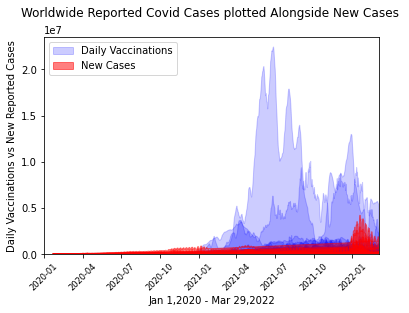

In [2]:
plt.stackplot(merge_df['date'],
              merge_df['daily_vaccinations'], 
              color='b', alpha=0.2)

plt.stackplot(merge_df['date'], 
              merge_df['new_cases'], 
              color='r', alpha=0.5)

plt.xlim(merge_df['date'].min(), covid_cases_df['date'].max())
plt.xticks(rotation=45, fontweight='light',  fontsize='small')
plt.xlabel('Jan 1,2020 - Mar 29,2022')
plt.ylabel('Daily Vaccinations vs New Reported Cases')
plt.title('Worldwide Reported Covid Cases plotted Alongside New Cases ', pad=20)
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

In [4]:
# I set the alpha to .2 to better visualize the peaks and slopes that were being obscured potentially by 
# countries who reportedcases poorly, resulting in vertical lines between datapoints. 
# Important distinction is that this is 1e6 so in millions, while the previous plot is in 1e7 or ten million.

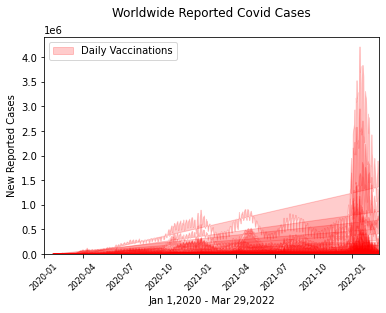

In [4]:
plt.stackplot(merge_df['date'], merge_df['new_cases'], color='r',alpha=0.2)
plt.xlim(merge_df['date'].min(), covid_cases_df['date'].max())
plt.xticks(rotation=45, fontweight='light',  fontsize='small')
plt.xlabel('Jan 1,2020 - Mar 29,2022')
plt.ylabel('New Reported Cases')
plt.title('Worldwide Reported Covid Cases', pad=20)
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

Overwhelmingly, on a global scale, the population of those vaccinated far exceeded the population of recorded cases. Overall, the population of the world far exceeds the population of those vaccinated. Notably, this is all just based on trusting the reported data from each country. Evidence for poor house keeping might even be possible to see from these plots.

# Daily Vaccinations vs New Cases Over Time for Country

In [6]:
#Sorting Large Countries dataframe to find top 3 and bottom 3 countries for 'people_vaccinated_per_hundred'
#from this dataframe by population for analysis
sorted_large_df = large_countries_df.groupby(['country'], as_index=False).max()\
.sort_values(by=['people_vaccinated_per_hundred'], ascending=False)

In [7]:
#Finding top 3 countries for analysis
sorted_large_df.head(3)

,country,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
2,China,China,2022-03-05,CHN,110868.0,361.0,4654.0,18.0,1.444216e+09,76.767,0.250,0.007677,1.269302e+09,22424286.0,87.89
22,South Korea,South Korea,2022-03-05,KOR,4456264.0,266838.0,8957.0,216.0,5.130518e+07,86857.967,5200.995,8.685797,4.488254e+07,880695.0,87.48
12,Italy,Italy,2022-03-05,ITA,12990223.0,228123.0,155782.0,718.0,6.036747e+07,215185.808,3778.906,21.518581,5.065603e+07,665762.0,83.91


In [8]:
#Finding bottom 3 countries for analysis
sorted_large_df.tail(3)

,country,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
17,Nigeria,Nigeria,2022-03-05,NGA,254637.0,6158.0,3142.0,93.0,211400704.0,1204.523,29.130,0.120452,17735985.0,286036.0,8.39
23,Tanzania,Tanzania,2022-03-05,TZA,33620.0,24307.0,798.0,669.0,61498438.0,546.681,395.246,0.054668,3223953.0,36892.0,5.24
4,Democratic Republic of Congo,Democratic Republic of Congo,2022-03-05,COD,86154.0,4481.0,1335.0,79.0,92377986.0,932.625,48.507,0.093262,754459.0,25961.0,0.82


In [9]:
#Create country dataframes
country1_df = large_countries_df.loc[large_countries_df['iso_code'] == 'CHN']
country2_df = large_countries_df.loc[large_countries_df['iso_code'] == 'KOR']
country3_df = large_countries_df.loc[large_countries_df['iso_code'] == 'ITA']
country4_df = large_countries_df.loc[large_countries_df['iso_code'] == 'NGA']
country5_df = large_countries_df.loc[large_countries_df['iso_code'] == 'TZA']
country6_df = large_countries_df.loc[large_countries_df['iso_code'] == 'COD']
usa_df = large_countries_df.loc[large_countries_df['iso_code'] == 'USA']
BRA_df = large_countries_df.loc[large_countries_df['iso_code'] == 'BRA']

# Top 3 Countries by 'people_vaccinated_per_hundred'

People Vaccinated Per Hundred: 87.89


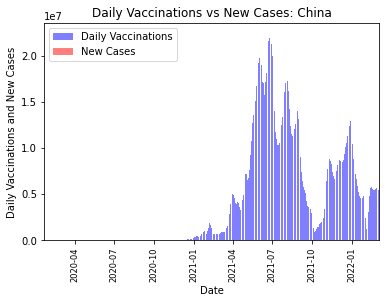

In [10]:
#Create Bar Chart for China
print(f"People Vaccinated Per Hundred: {country1_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country1_df['date'], country1_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country1_df['date'], country1_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country1_df['date'].min(), country1_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: China")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

People Vaccinated Per Hundred: 87.48


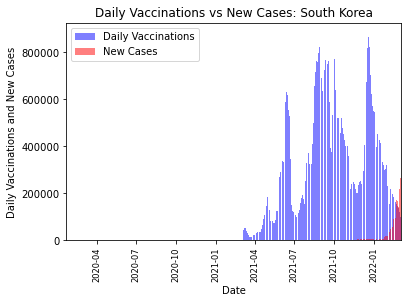

In [11]:
#Create Bar Chart for South Korea
print(f"People Vaccinated Per Hundred: {country2_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country2_df['date'], country2_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country2_df['date'], country2_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country2_df['date'].min(), country2_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: South Korea")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

People Vaccinated Per Hundred: 83.91


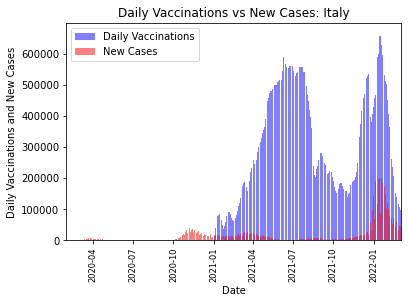

In [12]:
#Create Bar Chart for Italy
print(f"People Vaccinated Per Hundred: {country3_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country3_df['date'], country3_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country3_df['date'], country3_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country3_df['date'].min(), country3_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Italy")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

# Bottom 3 Countries by 'people_vaccinated_per_hundred'

People Vaccinated Per Hundred: 8.39


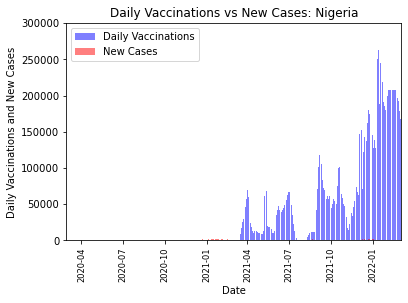

In [13]:
#Create Bar Chart for Nigeria
print(f"People Vaccinated Per Hundred: {country4_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country4_df['date'], country4_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country4_df['date'], country4_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country4_df['date'].min(), country4_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Nigeria")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

People Vaccinated Per Hundred: 5.24


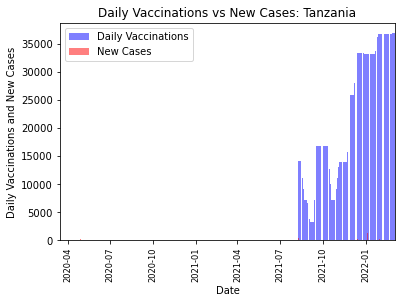

In [14]:
#Create Bar Chart for Tanzania
print(f"People Vaccinated Per Hundred: {country5_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country5_df['date'], country5_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country5_df['date'], country5_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country5_df['date'].min(), country5_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Tanzania")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

People Vaccinated Per Hundred: 0.82


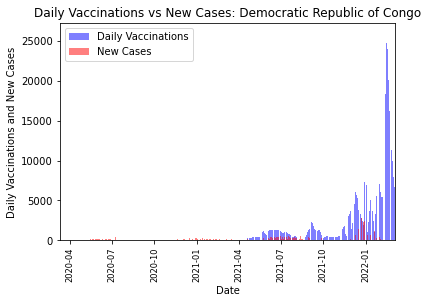

In [15]:
#Create Bar Chart for DRC
print(f"People Vaccinated Per Hundred: {country6_df['people_vaccinated_per_hundred'].max()}")
plt.bar(country6_df['date'], country6_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(country6_df['date'], country6_df['new_cases'], color='r', alpha=0.5)
plt.xlim(country6_df['date'].min(), country6_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Democratic Republic of Congo")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

# USA and Brazil

People Vaccinated Per Hundred: 76.63


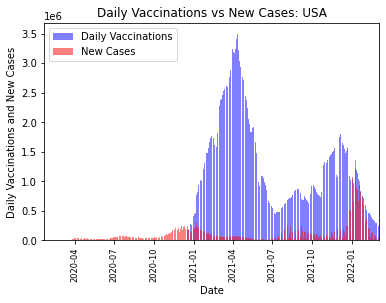

In [16]:
#Create Bar Chart for USA
print(f"People Vaccinated Per Hundred: {usa_df['people_vaccinated_per_hundred'].max()}")
plt.bar(usa_df['date'], usa_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(usa_df['date'], usa_df['new_cases'], color='r', alpha=0.5)
plt.xlim(usa_df['date'].min(), usa_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: USA")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

People Vaccinated Per Hundred: 83.28


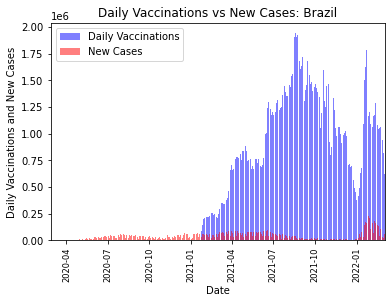

In [17]:
#Create Bar Chart for Brazil
print(f"People Vaccinated Per Hundred: {BRA_df['people_vaccinated_per_hundred'].max()}")
plt.bar(BRA_df['date'], BRA_df['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(BRA_df['date'], BRA_df['new_cases'], color='r', alpha=0.5)
plt.xlim(BRA_df['date'].min(), BRA_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.title("Daily Vaccinations vs New Cases: Brazil")
plt.xlabel('Date')
plt.ylabel ('Daily Vaccinations and New Cases')
plt.legend(['Daily Vaccinations','New Cases'], loc='upper left')
plt.show()

# Linear Regression of Daily Vaccinations vs Daily New Cases for World Data

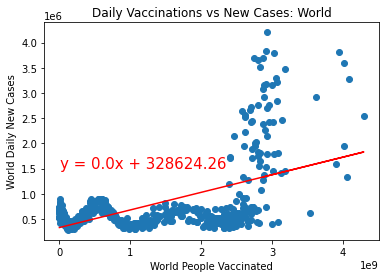

SLOPE: 0.00034960030786868637


In [5]:
# Looking at whole world data. 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(world_df['people_vaccinated'], \
                                                           world_df['new_cases'])

regress_values = world_df['people_vaccinated'] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(world_df['people_vaccinated'], regress_values, "r-")


plt.annotate(line_equation, (0.01e9,1.5e6), fontsize=15, color="red")
plt.scatter( world_df['people_vaccinated'], world_df['new_cases'])
plt.xlabel('World People Vaccinated')
plt.ylabel ('World Daily New Cases')
plt.title("Daily Vaccinations vs New Cases: World")
plt.show()

print(f'SLOPE: {slope}')

In [6]:
# Using world data before the omicron variant. '2021-11-01'

cutoff_df = world_df.loc[world_df['date'] < '2021-11-01']

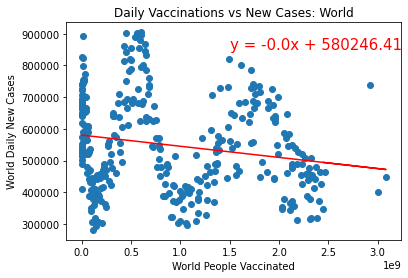

SLOPE: -3.519866117196024e-05
Correlation: 0.036542015854553696


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(cutoff_df['people_vaccinated'], \
                                                           cutoff_df['new_cases'])

regress_values = cutoff_df['people_vaccinated'] * slope + intercept
line_equation = "y = " + str(round(slope, 4)) + "x + " + str(round(intercept, 2))
plt.plot(cutoff_df['people_vaccinated'], regress_values, "r-")

plt.annotate(line_equation, (1.5e9,8.5e5), fontsize=15, color="red")
plt.scatter( cutoff_df['people_vaccinated'], cutoff_df['new_cases'])
plt.xlabel('World People Vaccinated')
plt.ylabel ('World Daily New Cases')
plt.title("Daily Vaccinations vs New Cases: World")
plt.show()

print(f'SLOPE: {slope}')
print(f'Correlation: {rvalue**2}')

# Finding